In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('Advertising.csv')

In [5]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
X = df.drop('sales', axis=1)

In [7]:
y = df['sales']

In [8]:
from sklearn.preprocessing import PolynomialFeatures

In [9]:
polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)

In [10]:
polynomial_converter.fit(X)

,degree,2
,interaction_only,False
,include_bias,False
,order,'C'


In [11]:
polyfeatures = polynomial_converter.transform(X)

# x1, x2, x3, x1^2, x2^2, x3^2, x1*x2, x1*x3, x2*x3

In [12]:
polyfeatures.shape

(200, 9)

In [13]:
X.shape
# polynomial features added 6 new features
# total features (3 original features + 6 new features = 9 total features)

(200, 3)

In [14]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [15]:
polyfeatures[0]
# 2.301e+02 is the value of TV for the first row
# 3.700e+01 is the value of radio for the first row
# 6.900e+01 is the value of newspaper for the first row

#e2 is scientific notation for 10^2

#5.291e+04 = 2.301e+02 * 2.301e+02 is the square of TV for the first row

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [16]:
print(230.1 * 37.8,
        230.1 * 69.2,
        37.8 * 69.2)

8697.779999999999 15922.92 2615.7599999999998


In [17]:
polynomial_converter.fit_transform(X)
# equivalent to calling fit and then transform

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]],
      shape=(200, 9))

In [18]:
polynomial_converter.get_feature_names_out()

array(['TV', 'radio', 'newspaper', 'TV^2', 'TV radio', 'TV newspaper',
       'radio^2', 'radio newspaper', 'newspaper^2'], dtype=object)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(polyfeatures, y, test_size=0.3, random_state=101)

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
model = LinearRegression()

In [23]:
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [24]:
test_predictions = model.predict(X_test)

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [28]:
MAE = mean_absolute_error(y_test, test_predictions)
MSE = mean_squared_error(y_test, test_predictions)

In [29]:
RMSE = np.sqrt(MSE)

In [30]:
MAE

0.48967980448035886

In [32]:
RMSE

np.float64(0.6646431757269)

In [33]:
#MAE: 1.213, RMSE: 1.516
#resutls from linear regression without polynomial features
#MAE: 0.489, RMSE: 0.664  
#results from linear regression with polynomial features

In [34]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [56]:
polyfeatures[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [52]:
new_df = pd.DataFrame(data=[model.coef_], columns=polynomial_converter.get_feature_names_out())
new_df

,TV,radio,newspaper,TV^2,TV radio,TV newspaper,radio^2,radio newspaper,newspaper^2
0,0.05171,0.013085,0.012,-0.000111,0.001142,-0.000052,0.000033,0.000146,-0.00003


<Axes: xlabel='sales', ylabel='Count'>

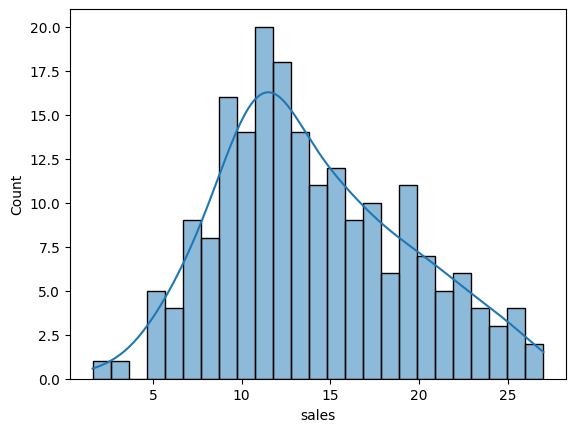

In [70]:
sns.histplot(df, x='sales', bins=25, kde=True)


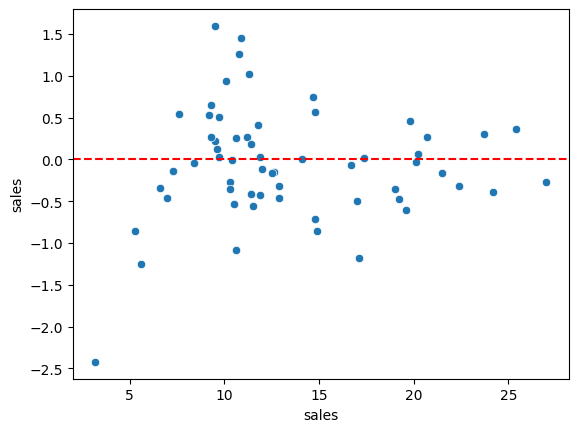

In [84]:
sns.scatterplot(x=y_test, y=y_test - test_predictions)
plt.axhline(y=0, color='r', linestyle='--')

In [76]:
test_predictions

array([13.94856153, 19.33480262, 12.31928162, 16.76286337,  7.90210901,
        6.94143792, 20.13372693, 17.50092709, 10.56889   , 20.12551788,
        9.44614537, 14.09935417, 12.05513493, 23.39254049, 19.67508393,
        9.15626258, 12.1163732 ,  9.28149557,  8.44604007, 21.65588129,
        7.05070331, 19.35854208, 27.26716369, 24.58689346,  9.03179421,
       11.81070232, 20.42630125,  9.19390639, 12.74795186,  8.64340674,
        8.66294151, 20.20047377, 10.93673817,  6.84639129, 18.27939359,
        9.47659449, 10.34242145,  9.6657038 ,  7.43347915, 11.03561332,
       12.65731013, 10.65459946, 11.20971496,  7.46199023, 11.38224982,
       10.27331262,  6.15573251, 15.50893362, 13.36092889, 22.71839277,
       10.40389682, 13.21622701, 14.23622207, 11.8723677 , 11.68463616,
        5.62217738, 25.03778913,  9.53507734, 17.37926571, 15.7534364 ])

<Axes: ylabel='Count'>

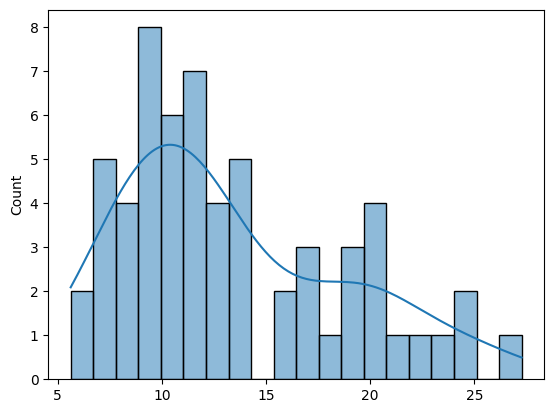

In [80]:
sns.histplot(test_predictions, bins=20, kde=True)

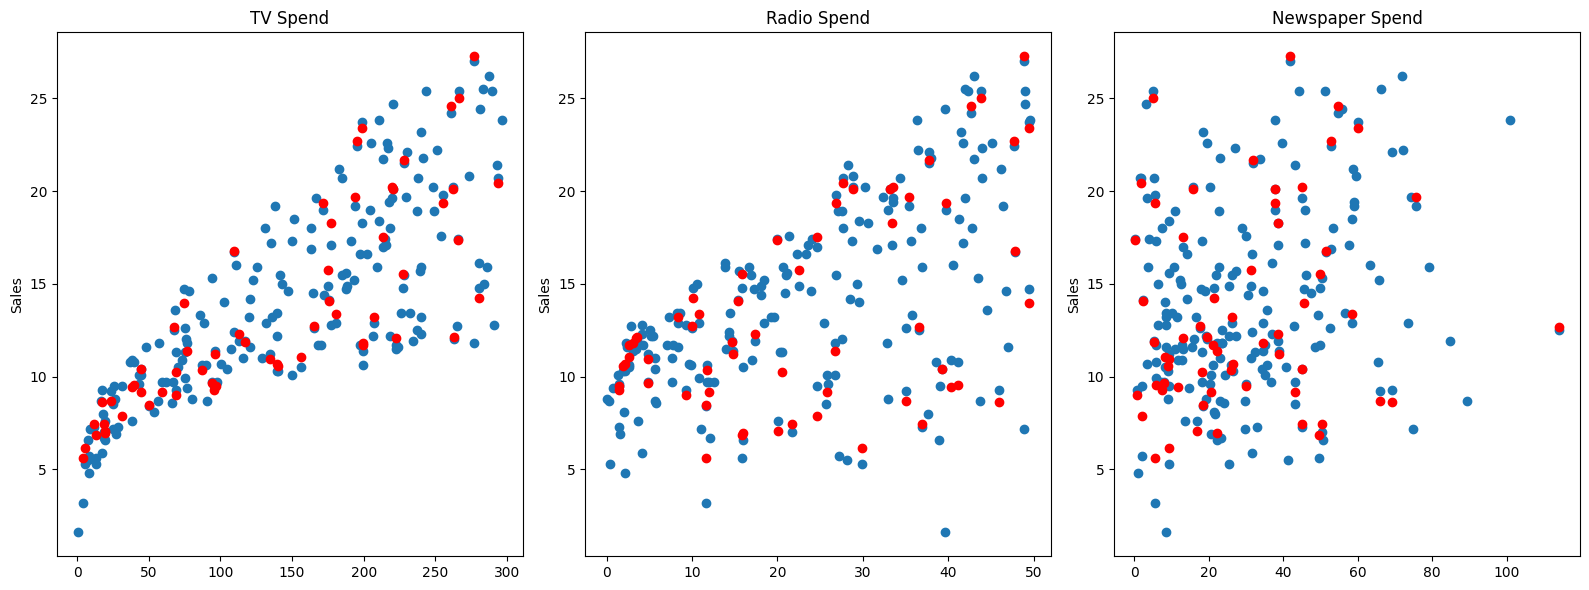

In [95]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].plot(X_test[:, 0], test_predictions,'o',color='red')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].plot(X_test[:, 1],test_predictions,'o',color='red')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].plot(X_test[:, 2],test_predictions,'o',color='red')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

In [96]:
import scipy as sp

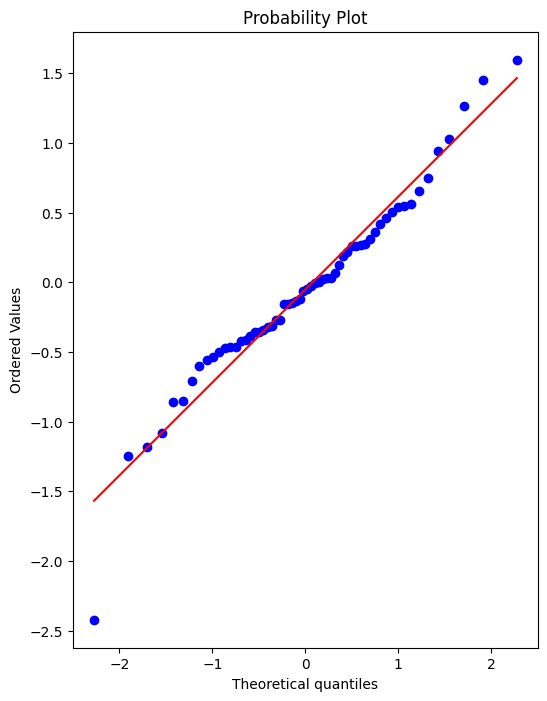

In [99]:
fig, ax = plt.subplots(figsize=(6,8), dpi=100)
_ = sp.stats.probplot(y_test - test_predictions, plot=ax)

In [101]:
(y_test - test_predictions).mean()

np.float64(-0.05139676982131441)

In [102]:
mean_absolute_error(y_test, test_predictions)

0.48967980448035886

In [104]:
np.sqrt(mean_squared_error(y_test, test_predictions))

np.float64(0.6646431757269)

In [107]:
polyfeatures[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [150]:
from sklearn.preprocessing import PolynomialFeatures
apoly = PolynomialFeatures(degree=4, include_bias=False)

In [151]:
afeatures = apoly.fit_transform(X)

In [152]:
from sklearn.model_selection import train_test_split
A_X_train, A_X_test, A_y_train, A_y_test = train_test_split(afeatures, y, test_size=0.3, random_state=101)

In [153]:
from sklearn.linear_model import LinearRegression

amodel = LinearRegression()
amodel.fit(A_X_train, A_y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [154]:
(amodel.predict(A_X_test) - y_test).mean()

np.float64(0.03163675584210958)

In [155]:
mean_absolute_error(A_y_test, amodel.predict(A_X_test))

0.3926093749681009

In [156]:
mean_squared_error(A_y_test, amodel.predict(A_X_test))**0.5

0.5077742640851456

In [278]:
adata = pd.DataFrame(columns=["residuals", "MAE", "RMSE", "tr_residuals", "tr_MAE", "tr_RMSE"])

In [279]:
adata

,residuals,MAE,RMSE,tr_residuals,tr_MAE,tr_RMSE


In [280]:
for d in range(1, int(input())):
    apoly = PolynomialFeatures(degree=d, include_bias=False)
    afeatures = apoly.fit_transform(X)
    A_X_train, A_X_test, A_y_train, A_y_test = train_test_split(afeatures,
                                                                 y, test_size=0.3, 
                                                                 random_state=101)
    amodel.fit(A_X_train, A_y_train)

    MAEhere = mean_absolute_error(A_y_test, amodel.predict(A_X_test))
    RMSEhere = mean_squared_error(A_y_test, amodel.predict(A_X_test))**0.5

    trMAEhere = mean_absolute_error(A_y_train, amodel.predict(A_X_train))
    trRMSEhere = mean_squared_error(A_y_train, amodel.predict(A_X_train))**0.5

    adata.loc[d] = [(A_y_test - amodel.predict(A_X_test)).mean(), MAEhere, RMSEhere,
                     (amodel.predict(A_X_train) - A_y_train).mean(),
                       trMAEhere, trRMSEhere]

In [281]:

adata

,residuals,MAE,RMSE,tr_residuals,tr_MAE,tr_RMSE
1,-0.183015,1.213746,1.516152,2.157005e-15,1.252446,1.734594
2,-0.051397,0.489680,0.664643,-1.078502e-16,0.404925,0.587957
3,0.014399,0.412752,0.580329,-3.784274e-15,0.291097,0.433934
4,-0.031637,0.392609,0.507774,4.174439e-15,0.246006,0.351708
5,0.219312,0.665960,2.575819,-4.758099e-16,0.186212,0.250934


In [282]:
adata['MAE']

1    1.213746
2    0.489680
3    0.412752
4    0.392609
5    0.665960
Name: MAE, dtype: float64

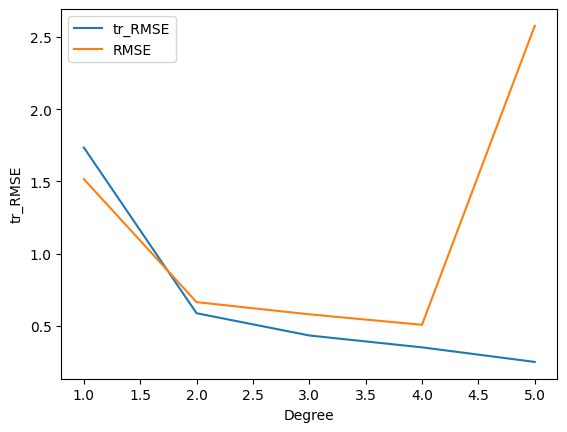

In [ ]:
plt.plot(range(1, 6), adata["tr_RMSE"][:5], label="tr_RMSE")
plt.plot(range(1, 6), adata["RMSE"][:5], label="RMSE")


plt.xlabel("Degree")
plt.ylabel("tr_RMSE")
plt.legend()


# RMSE and MAE are increasing on the test set as we increase the degree of the polynomial
# This is a sign of overfitting
# The model is learning the training data too well, including its noise and outliers
# As a result, the model performs poorly on new, unseen data (the test set)
# This is a classic example of the bias-variance tradeoff


#as at degree 4 RMSE is sharply increasing, we will choose degree with less than 4 value



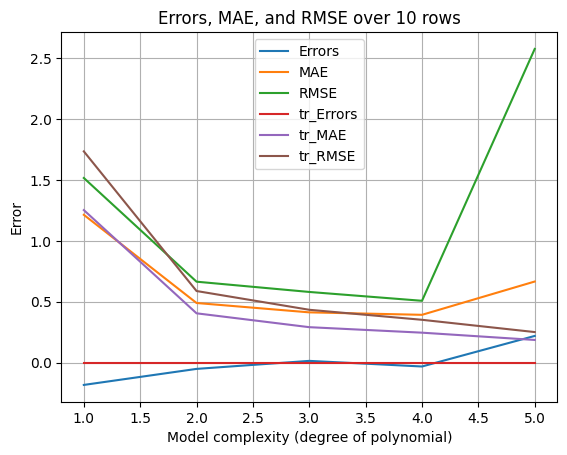

In [286]:
plt.plot(adata.index, adata["residuals"], label="Errors")
plt.plot(adata.index, adata["MAE"], label="MAE")
plt.plot(adata.index, adata["RMSE"], label="RMSE")
plt.plot(adata.index, adata["tr_residuals"], label="tr_Errors")
plt.plot(adata.index, adata["tr_MAE"], label="tr_MAE")
plt.plot(adata.index, adata["tr_RMSE"], label="tr_RMSE")


plt.xlabel("Model complexity (degree of polynomial)")
plt.ylabel("Error")
plt.title("Errors, MAE, and RMSE over 10 rows")
plt.legend()
plt.grid(True)
plt.show()


In [290]:
final_poly_converter = PolynomialFeatures(degree=3, include_bias=False)

In [291]:
final_model = LinearRegression()

In [292]:
full_converted_X = final_poly_converter.fit_transform(X)

final_model.fit(full_converted_X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [294]:
from joblib import dump, load

In [295]:
dump(final_model, 'final_poly_model.joblib')

['final_poly_model.joblib']

In [296]:
dump(final_poly_converter, 'final_poly_converter.joblib')

['final_poly_converter.joblib']

In [297]:
loaded_converter = load('final_poly_converter.joblib')

In [298]:
loaded_model = load('final_poly_model.joblib')

In [299]:
campaign = [[149, 22, 12]]

In [301]:
transformed_campaign = loaded_converter.transform(campaign)

d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [303]:
loaded_model.predict(transformed_campaign)

array([14.64501014])